<a href="https://colab.research.google.com/github/eshreyareddy/Dimensionality-reduction-techniques/blob/main/PCA%2C_SVD%2C_MDS%2C_ISOMap%2C_LLE_%2C_UMAP_%26_t_sne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
mnist_train = pd.read_csv('/content/mnist_test.csv')
mnist_test = pd.read_csv('/content/mnist_test.csv')

# Assuming the first column is the label
y_train = mnist_train.iloc[:, 0]
X_train = mnist_train.iloc[:, 1:]

y_test = mnist_test.iloc[:, 0]
X_test = mnist_test.iloc[:, 1:]


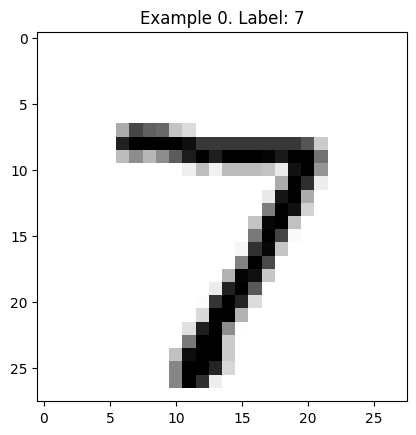

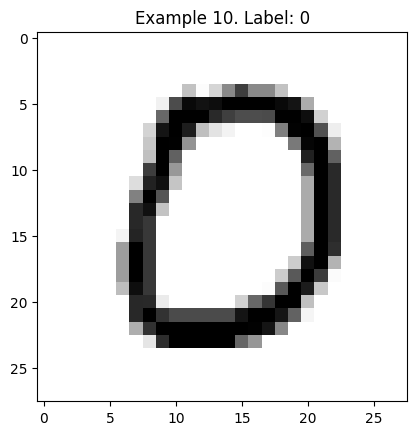

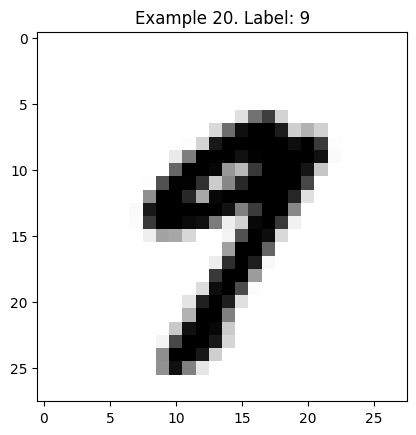

In [3]:
# Function to display a digit
def display_digit(index, data, labels):
    label = labels.iloc[index]
    image = data.iloc[index].to_numpy().reshape(28, 28)
    plt.title('Example %d. Label: %d' % (index, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

# Display a few digits from the dataset
display_digit(0, X_train, y_train)
display_digit(10, X_train, y_train)
display_digit(20, X_train, y_train)


In [4]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)

# Print the number of components
print("Number of PCA components:", pca.n_components_)


Number of PCA components: 280


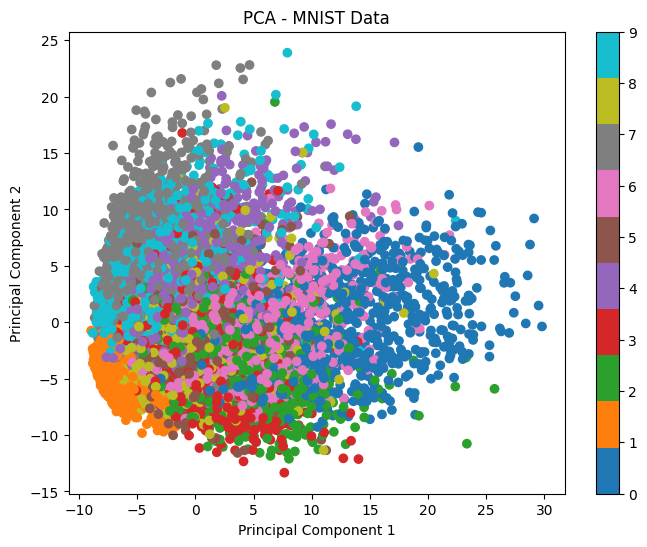

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10')
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - MNIST Data')
plt.show()


In [19]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

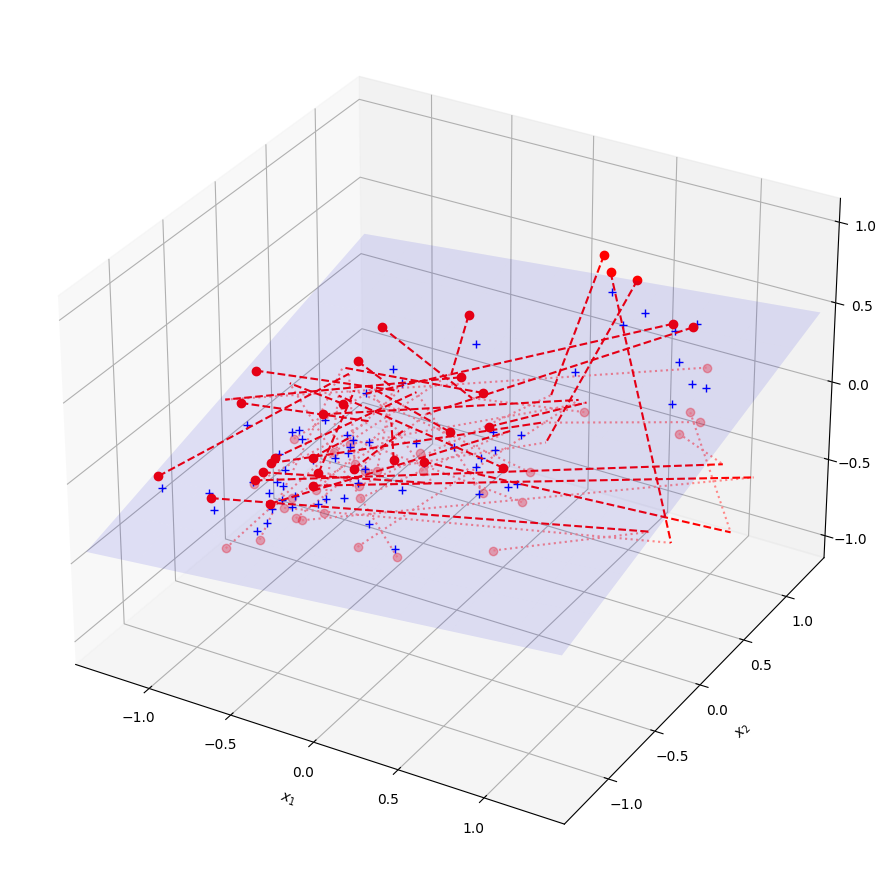

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Example dataset X - replace with your actual dataset
# X = your_dataset_here

# PCA Transformation
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # Reduce dataset to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples

# Centering the data
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

# Create a meshgrid for the 2D projection plane
axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]

# Samples above and below the projection plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]

# Plotting
fig = plt.figure(figsize=(9, 9), tight_layout=True)
ax = fig.add_subplot(111, projection='3d')

# Plot samples and projection lines below the plane first
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], 'ro', alpha=0.3)
for i in range(len(X3D_below)):
    ax.plot([X3D_below[i][0], X2D[i][0]],
            [X3D_below[i][1], X2D[i][1]],
            [X3D_below[i][2], 0], ":", color="#F88")

# Plot the projection plane
ax.plot_surface(x1, x2, z, alpha=0.1, color="b")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")

# Plot samples and projection lines above the plane
for i in range(len(X3D_above)):
    ax.plot([X3D_above[i][0], X2D[i][0]],
            [X3D_above[i][1], X2D[i][1]],
            [X3D_above[i][2], 0], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

# Setting the axes labels
ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])


# ... your plotting code ...

plt.tight_layout()  # Adjust layout
plt.savefig("dataset_3d_plot.png")  # Save the figure
plt.show()






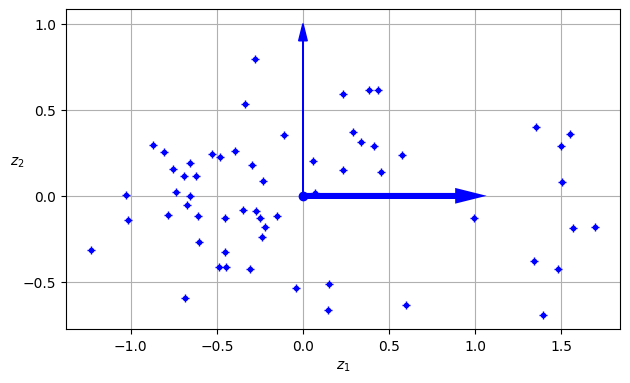

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)

# Save the figure
plt.tight_layout()
plt.savefig("/content/dataset_2d_plot.png")
plt.show()


In [32]:
from sklearn.datasets import make_swiss_roll

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
# extra code – this cell generates and saves Figure 8–4



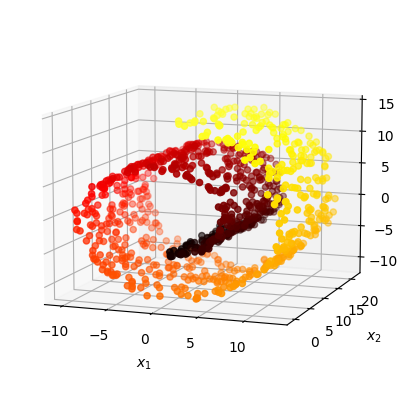

In [35]:
from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
set_xyz_axes(ax, axes)
plt.savefig("/content/swiss_roll_plot.png.png")
plt.show()

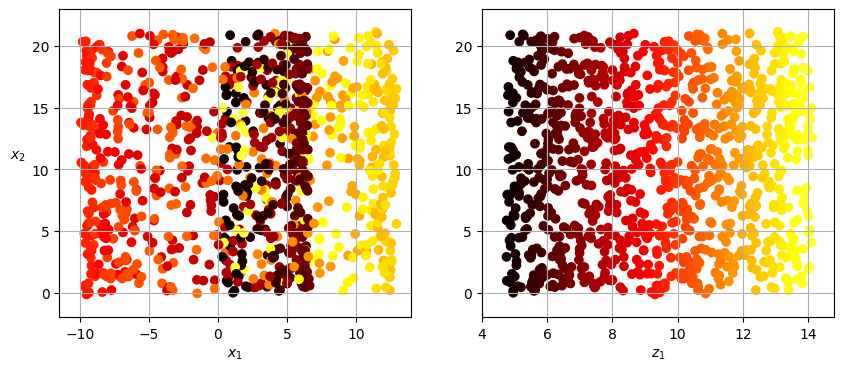

In [37]:
# extra code – this cell generates and saves plots for Figure 8–5

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X_swiss[:, 0], X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis([4, 14.8, axes[2], axes[3]])
plt.xlabel("$z_1$")
plt.grid(True)

plt.savefig("squished_swiss_roll_plot.png")
plt.show()


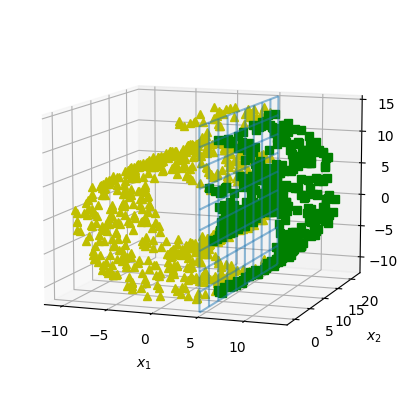

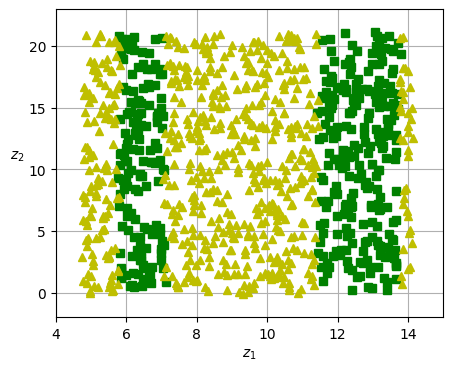

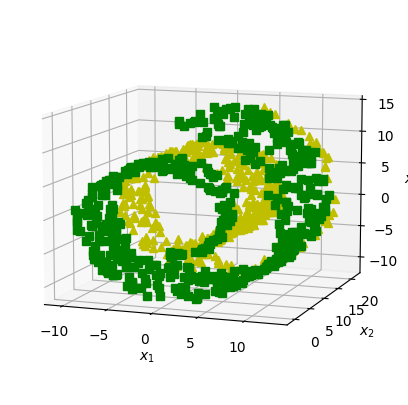

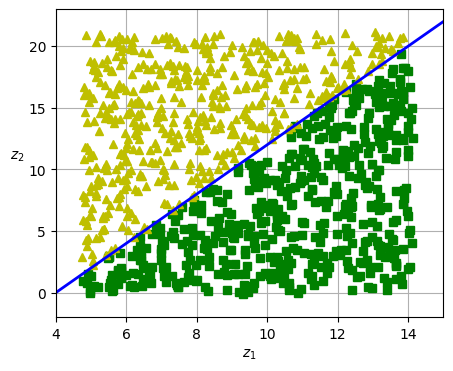

In [38]:
axes = [-11.5, 14, -2, 23, -12, 15]
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

positive_class = X_swiss[:, 0] > 5
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
set_xyz_axes(ax, axes)
plt.savefig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
plt.savefig("manifold_decision_boundary_plot2")
plt.show()

positive_class = 2 * (t[:] - 4) > X_swiss[:, 1]
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel("$x_1$", rotation=0)
ax.set_ylabel("$x_2$", rotation=0)
ax.set_zlabel("$x_3$", rotation=0)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.savefig("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.plot([4, 15], [0, 22], "b-", linewidth=2)
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
plt.savefig("manifold_decision_boundary_plot4")
plt.show()

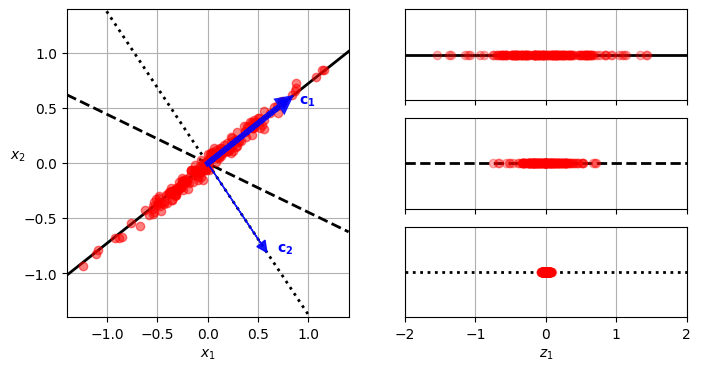

In [39]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X_line = np.random.randn(m, 2) / 10
X_line = X_line @ np.array([[stretch, 0], [0, 1]])  # stretch
X_line = X_line @ [[np.cos(angle), np.sin(angle)],
                   [np.sin(angle), np.cos(angle)]]  # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi / 6), np.sin(angle - 2 * np.pi / 6)])
u3 = np.array([np.cos(angle - np.pi / 2), np.sin(angle - np.pi / 2)])

X_proj1 = X_line @ u1.reshape(-1, 1)
X_proj2 = X_line @ u2.reshape(-1, 1)
X_proj3 = X_line @ u3.reshape(-1, 1)

plt.figure(figsize=(8, 4))
plt.subplot2grid((3, 2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4 * u1[1] / u1[0], 1.4 * u1[1] / u1[0]], "k-",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u2[1] / u2[0], 1.4 * u2[1] / u2[0]], "k--",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u3[1] / u3[0], 1.4 * u3[1] / u3[0]], "k:",
         linewidth=2)
plt.plot(X_line[:, 0], X_line[:, 1], "ro", alpha=0.5)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=4, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=1, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", color="blue")
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.grid()

plt.subplot2grid((3, 2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=2)
plt.plot(X_proj1[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=2)
plt.plot(X_proj2[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$")
plt.grid()

plt.savefig("pca_best_projection_plot")
plt.show()

In [40]:
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train, y_train)
X_recovered = pca.inverse_transform(X_reduced)

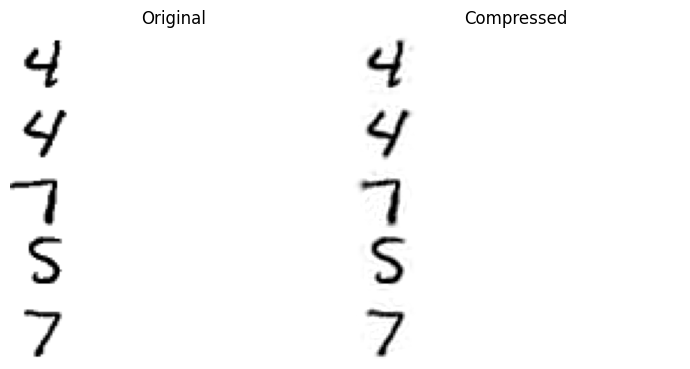

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to NumPy arrays if they are pandas DataFrames
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
if isinstance(X_recovered, pd.DataFrame):
    X_recovered = X_recovered.to_numpy()

plt.figure(figsize=(7, 4))

for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    num_images = min(25, len(X))  # Ensure not to exceed the number of images in X
    for i in range(num_images):
        row, col = i // 5, i % 5
        plt.imshow(X[i].reshape(28, 28), cmap="binary", vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
        plt.axis([0, 5, 0, 5])
        plt.axis("off")

plt.tight_layout()
plt.savefig("/content/mnist_compression_plot.png")  # Adjust the path as needed
plt.show()




In [47]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

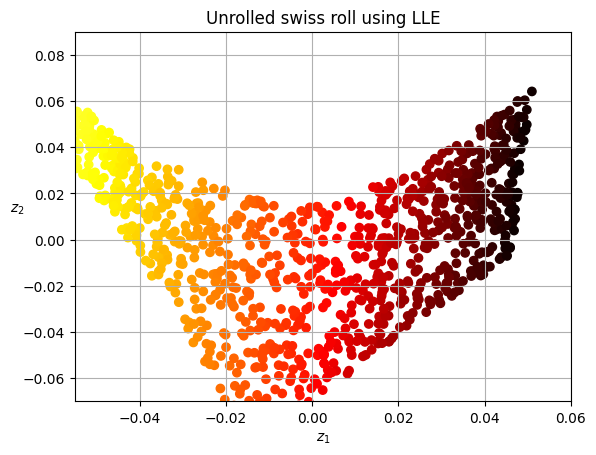

In [50]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)
# extra code – this cell generates and saves Figure 8–10

plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

plt.savefig("lle_unrolling_plot")
plt.title("Unrolled swiss roll using LLE")
plt.show()

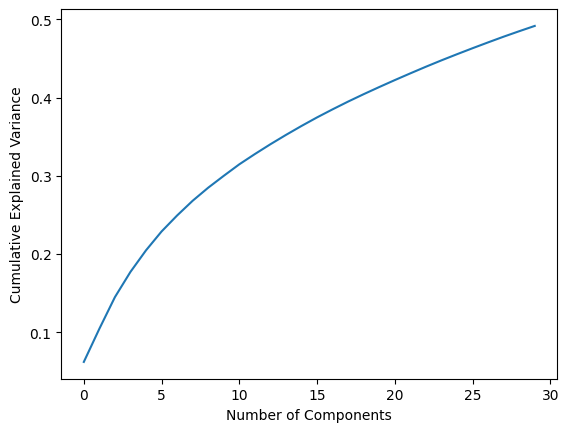

In [6]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=30)  # You can adjust the number of components
X_train_svd = svd.fit_transform(X_train_scaled)

# Visualize the variance explained by each component
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


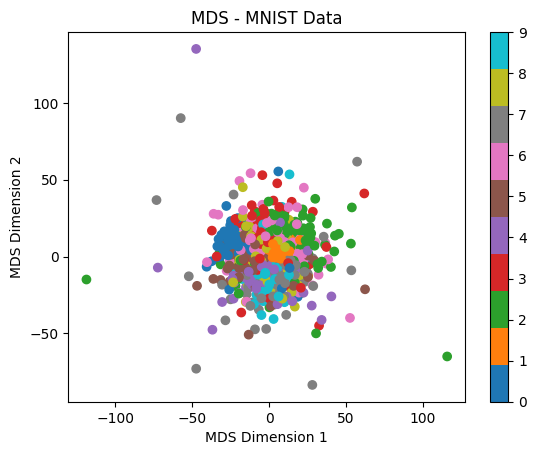

In [7]:
from sklearn.manifold import MDS

# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_train_mds = mds.fit_transform(X_train_scaled[:1000])  # Using a subset of data

# Visualize the results
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_train[:1000], cmap='tab10')
plt.colorbar()
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS - MNIST Data')
plt.show()


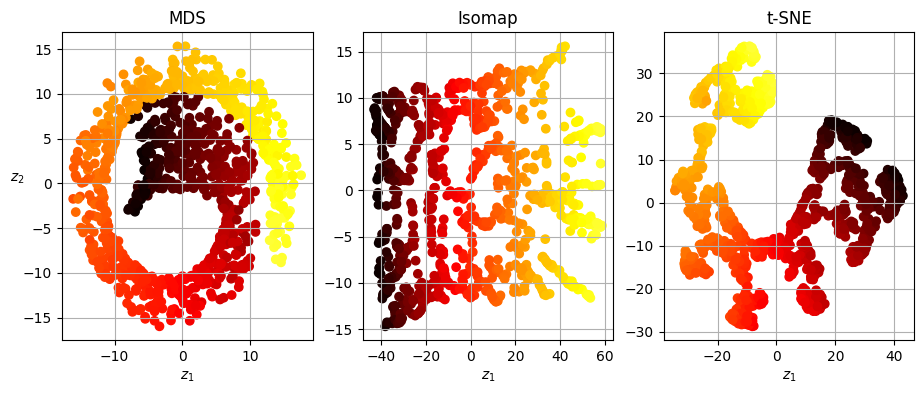

In [51]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, normalized_stress=False, random_state=42)
X_reduced_mds = mds.fit_transform(X_swiss)
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_swiss)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X_swiss)
# extra code – this cell generates and saves Figure 8–11

titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.savefig("other_dim_reduction_plot")
plt.show()

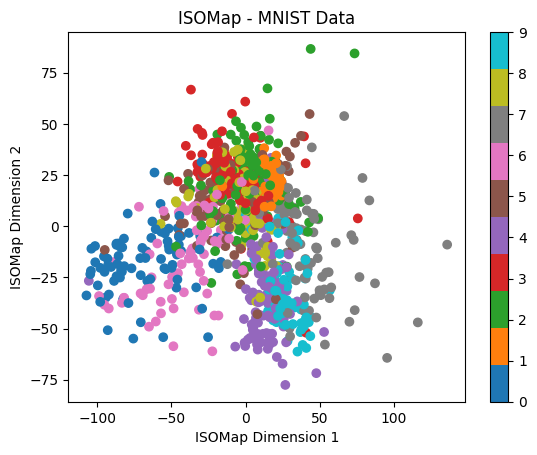

In [53]:
from sklearn.manifold import Isomap

# Apply ISOMap
isomap = Isomap(n_components=2, n_neighbors=5)
X_train_isomap = isomap.fit_transform(X_train_scaled[:1000])

# Visualize the results
plt.scatter(X_train_isomap[:, 0], X_train_isomap[:, 1], c=y_train[:1000], cmap='tab10')
plt.colorbar()
plt.xlabel('ISOMap Dimension 1')
plt.ylabel('ISOMap Dimension 2')
plt.title('ISOMap - MNIST Data')
plt.show()


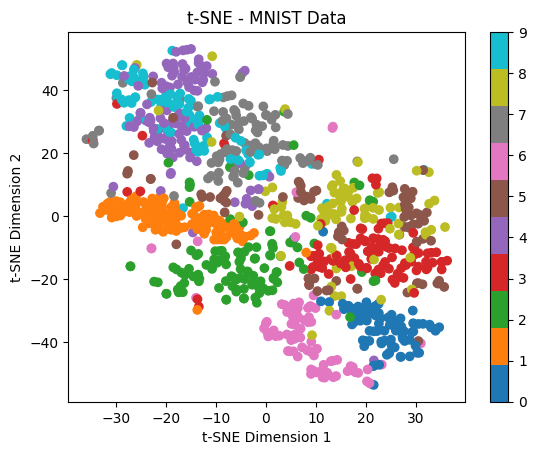

In [9]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_train_tsne = tsne.fit_transform(X_train_scaled[:1000])  # Using a subset for performance

# Visualize the results
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train[:1000], cmap='tab10')
plt.colorbar()
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE - MNIST Data')
plt.show()


In [11]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=4776211cd15e884c85349adc7169a22447d165b1c57b8a55f077d38791535620
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


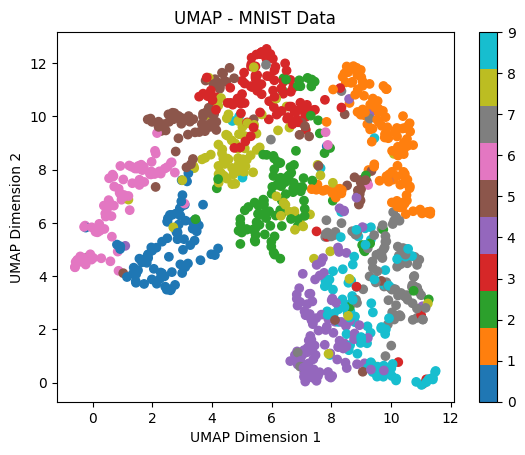

In [12]:
import umap

# Apply UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
X_train_umap = umap_model.fit_transform(X_train_scaled[:1000])

# Visualize the results
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train[:1000], cmap='tab10')
plt.colorbar()
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP - MNIST Data')
plt.show()


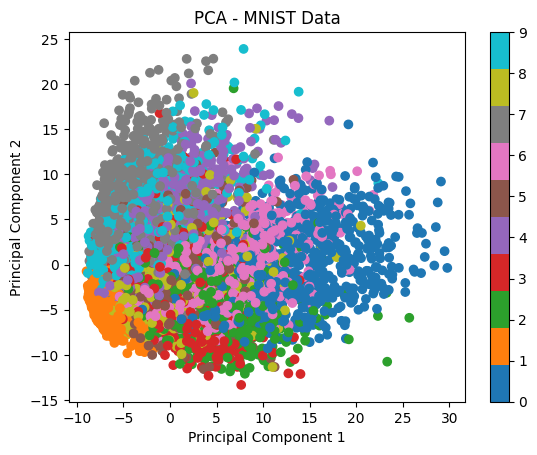

In [14]:
# Example for plotting the results of PCA
# Ensure that X_train_pca, y_train are appropriately subsetted if needed
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10')  # Assuming X_train_pca and y_train have the same number of elements
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - MNIST Data')
plt.show()


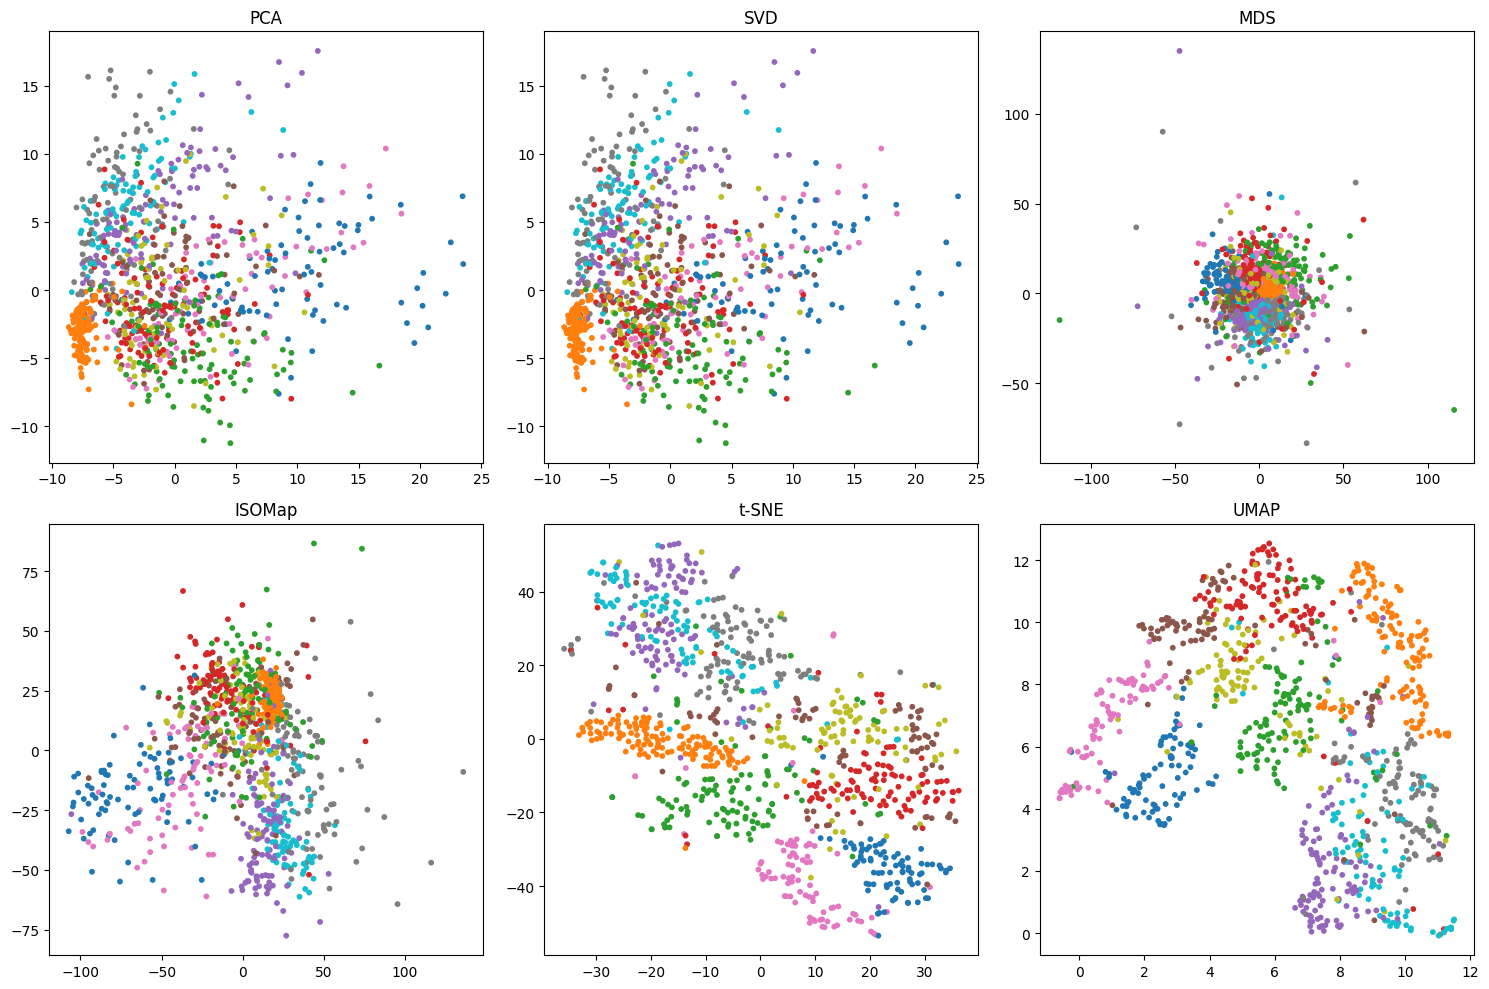

In [16]:
# Assuming each technique has been applied to the first 1000 samples
techniques = [X_train_pca[:1000], X_train_svd[:1000], X_train_mds[:1000], X_train_isomap[:1000], X_train_tsne[:1000], X_train_umap[:1000]]
titles = ['PCA', 'SVD', 'MDS', 'ISOMap', 't-SNE', 'UMAP']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for ax, data, title in zip(axes.flatten(), techniques, titles):
    ax.scatter(data[:, 0], data[:, 1], c=y_train[:1000], cmap='tab10', s=10)  # Use the same subset of y_train for coloring
    ax.set_title(title)

plt.tight_layout()
plt.show()


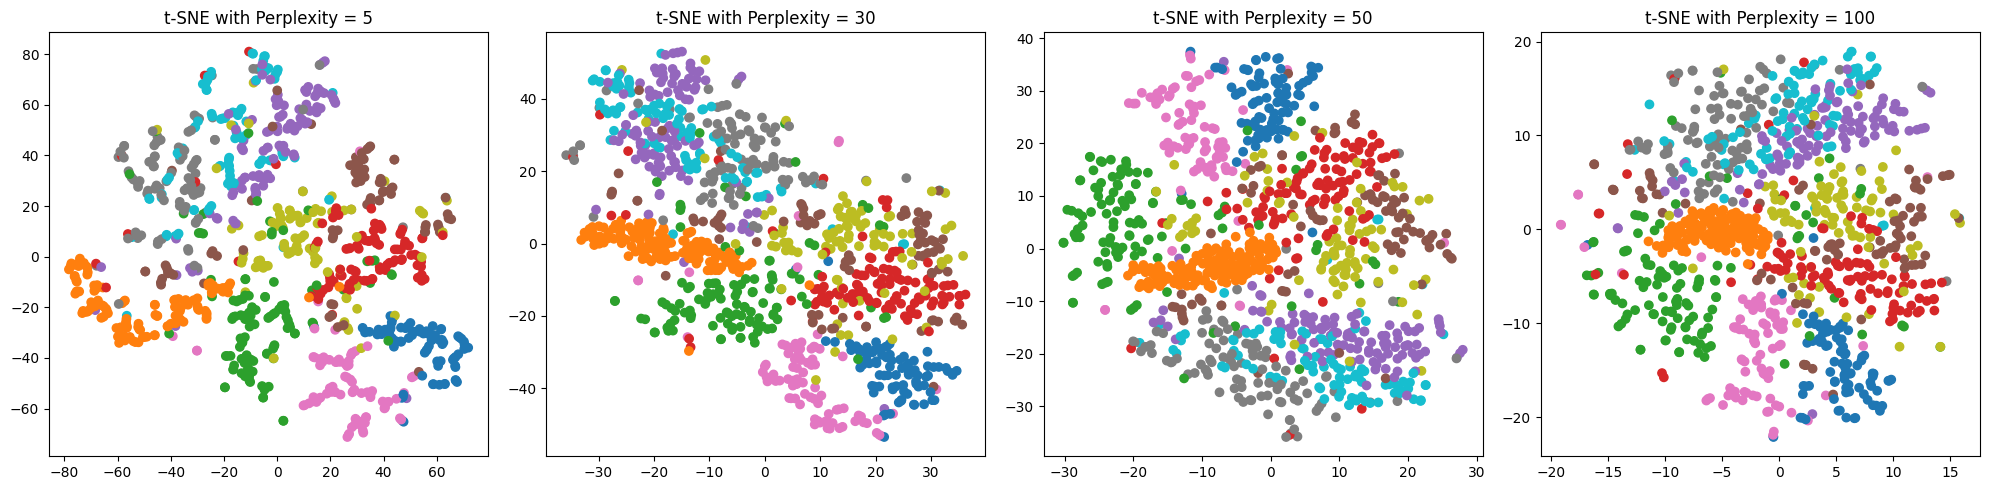

In [17]:
perplexities = [5, 30, 50, 100]
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, perplexity in zip(axes, perplexities):
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=1000)
    X_train_tsne = tsne.fit_transform(X_train_scaled[:1000])
    ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train[:1000], cmap='tab10')
    ax.set_title(f't-SNE with Perplexity = {perplexity}')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} over

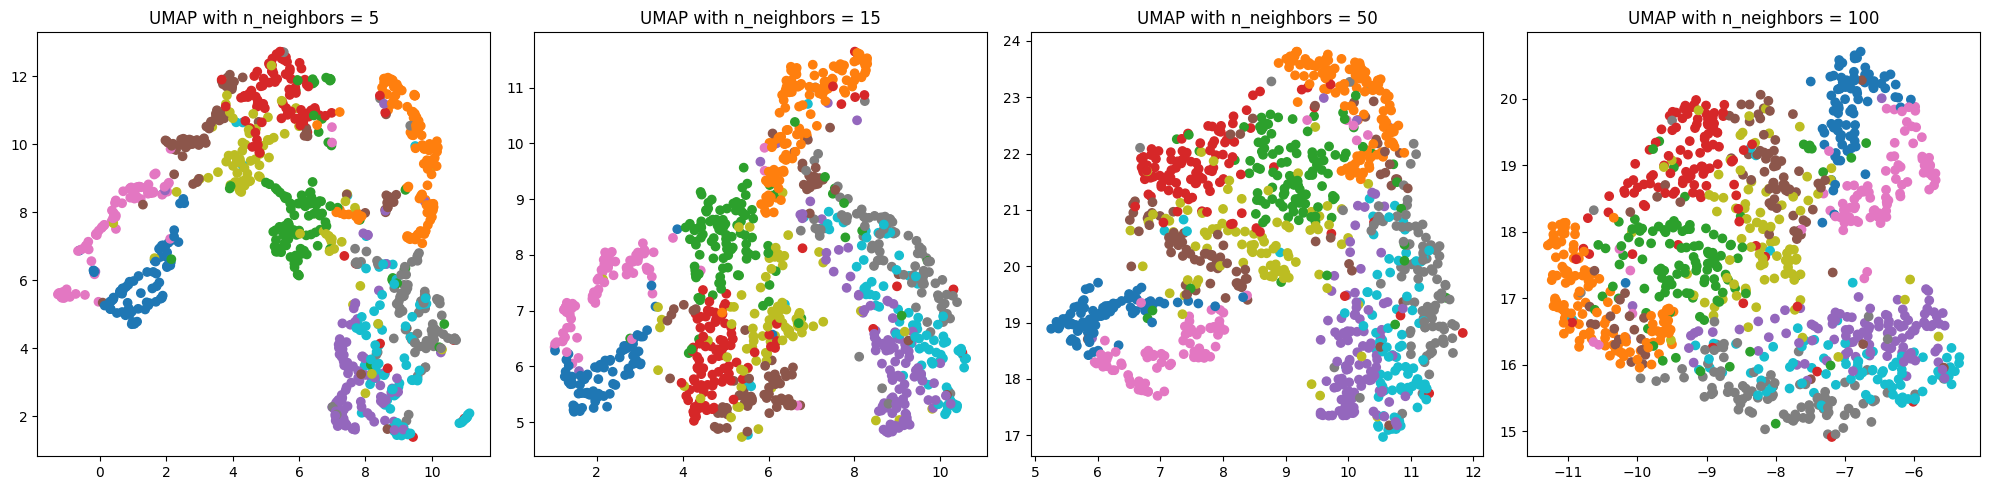

In [18]:
n_neighbors_values = [5, 15, 50, 100]
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, n_neighbors in zip(axes, n_neighbors_values):
    umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.1, n_components=2, random_state=42)
    X_train_umap = umap_model.fit_transform(X_train_scaled[:1000])
    ax.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train[:1000], cmap='tab10')
    ax.set_title(f'UMAP with n_neighbors = {n_neighbors}')
plt.tight_layout()
plt.show()


In [60]:
X_sample, y_sample = X_train[:5000], y_train[:5000]

In [62]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
%time X_reduced = tsne.fit_transform(X_sample)

CPU times: user 1min 31s, sys: 24.8 ms, total: 1min 32s
Wall time: 1min 1s


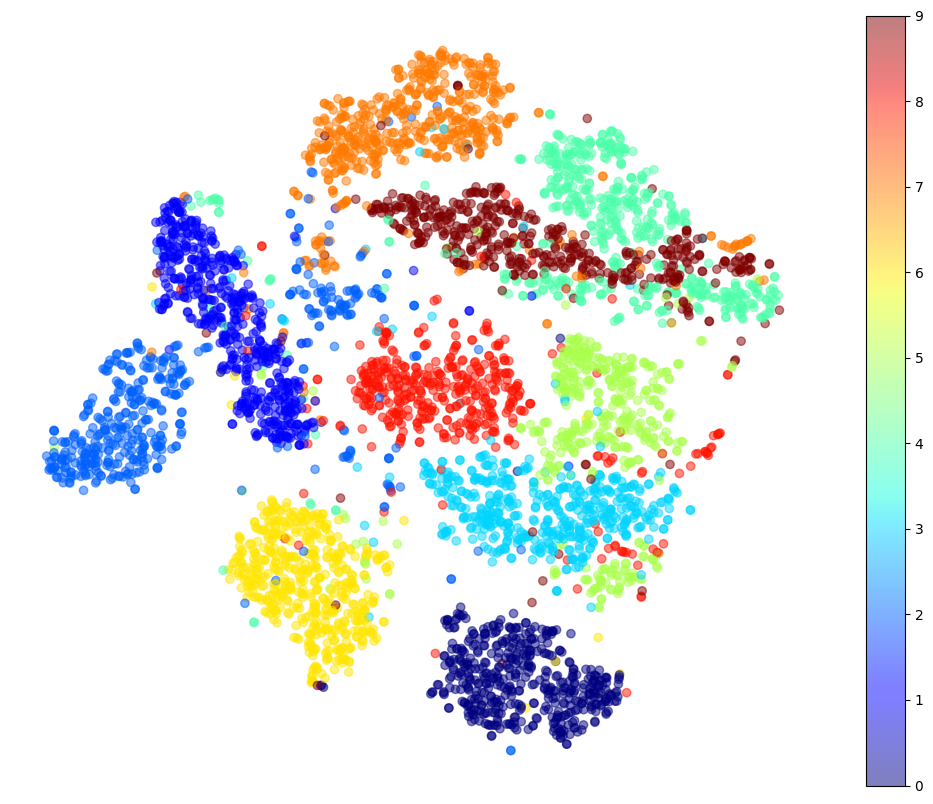

In [64]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

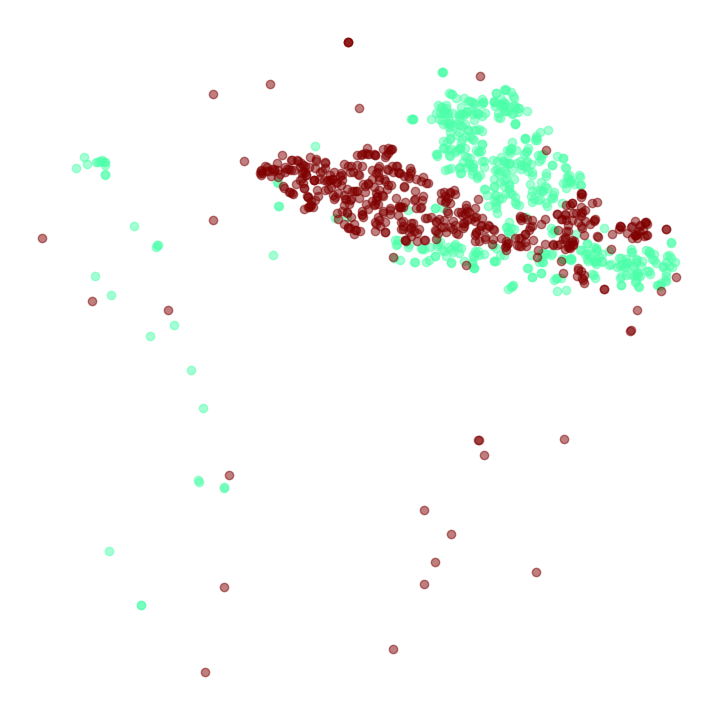

In [66]:
plt.figure(figsize=(9, 9))
cmap = plt.cm.jet
for digit in ('4', '9'):
    plt.scatter(X_reduced[y_sample == digit, 0], X_reduced[y_sample == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

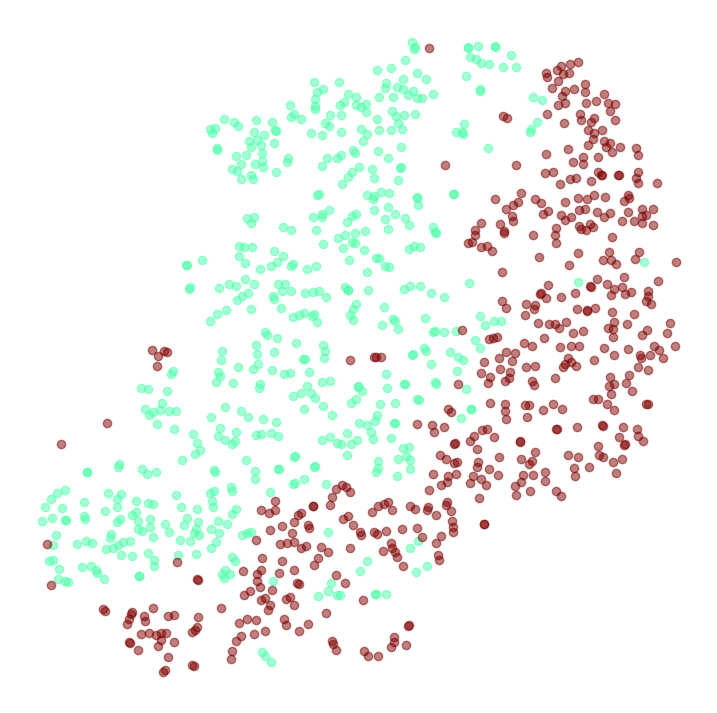

In [67]:
idx = (y_sample == '4') | (y_sample == '9')
X_subset = X_sample[idx]
y_subset = y_sample[idx]

tsne_subset = TSNE(n_components=2, init="random", learning_rate="auto",
                   random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)
plt.figure(figsize=(9, 9))
for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

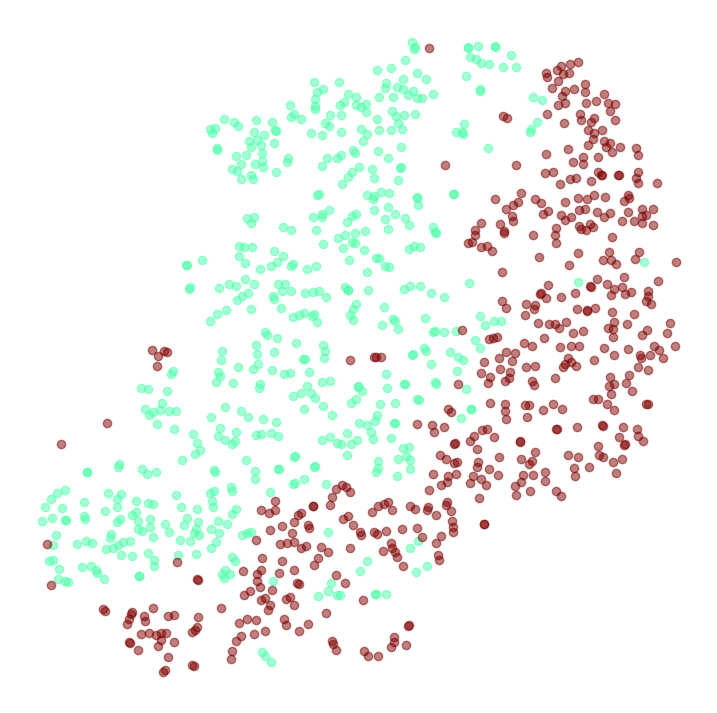

In [68]:
idx = (y_sample == '4') | (y_sample == '9')
X_subset = X_sample[idx]
y_subset = y_sample[idx]

tsne_subset = TSNE(n_components=2, init="random", learning_rate="auto",
                   random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)
plt.figure(figsize=(9, 9))
for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

In [57]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

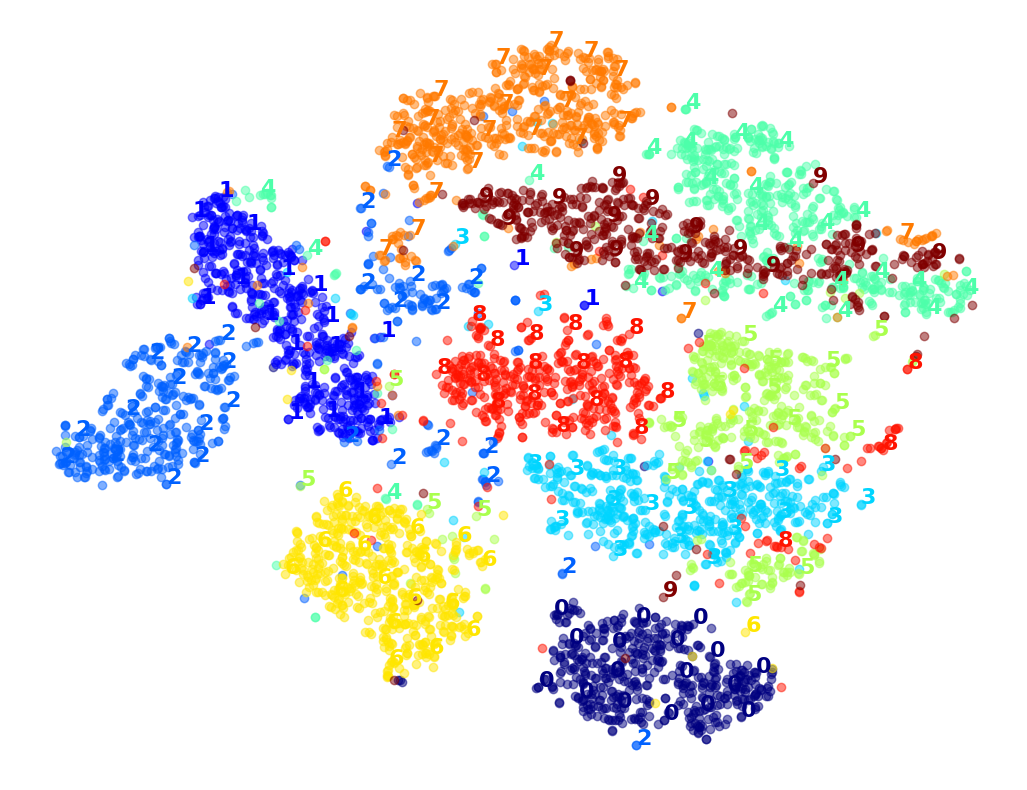

In [69]:
plot_digits(X_reduced, y_sample)

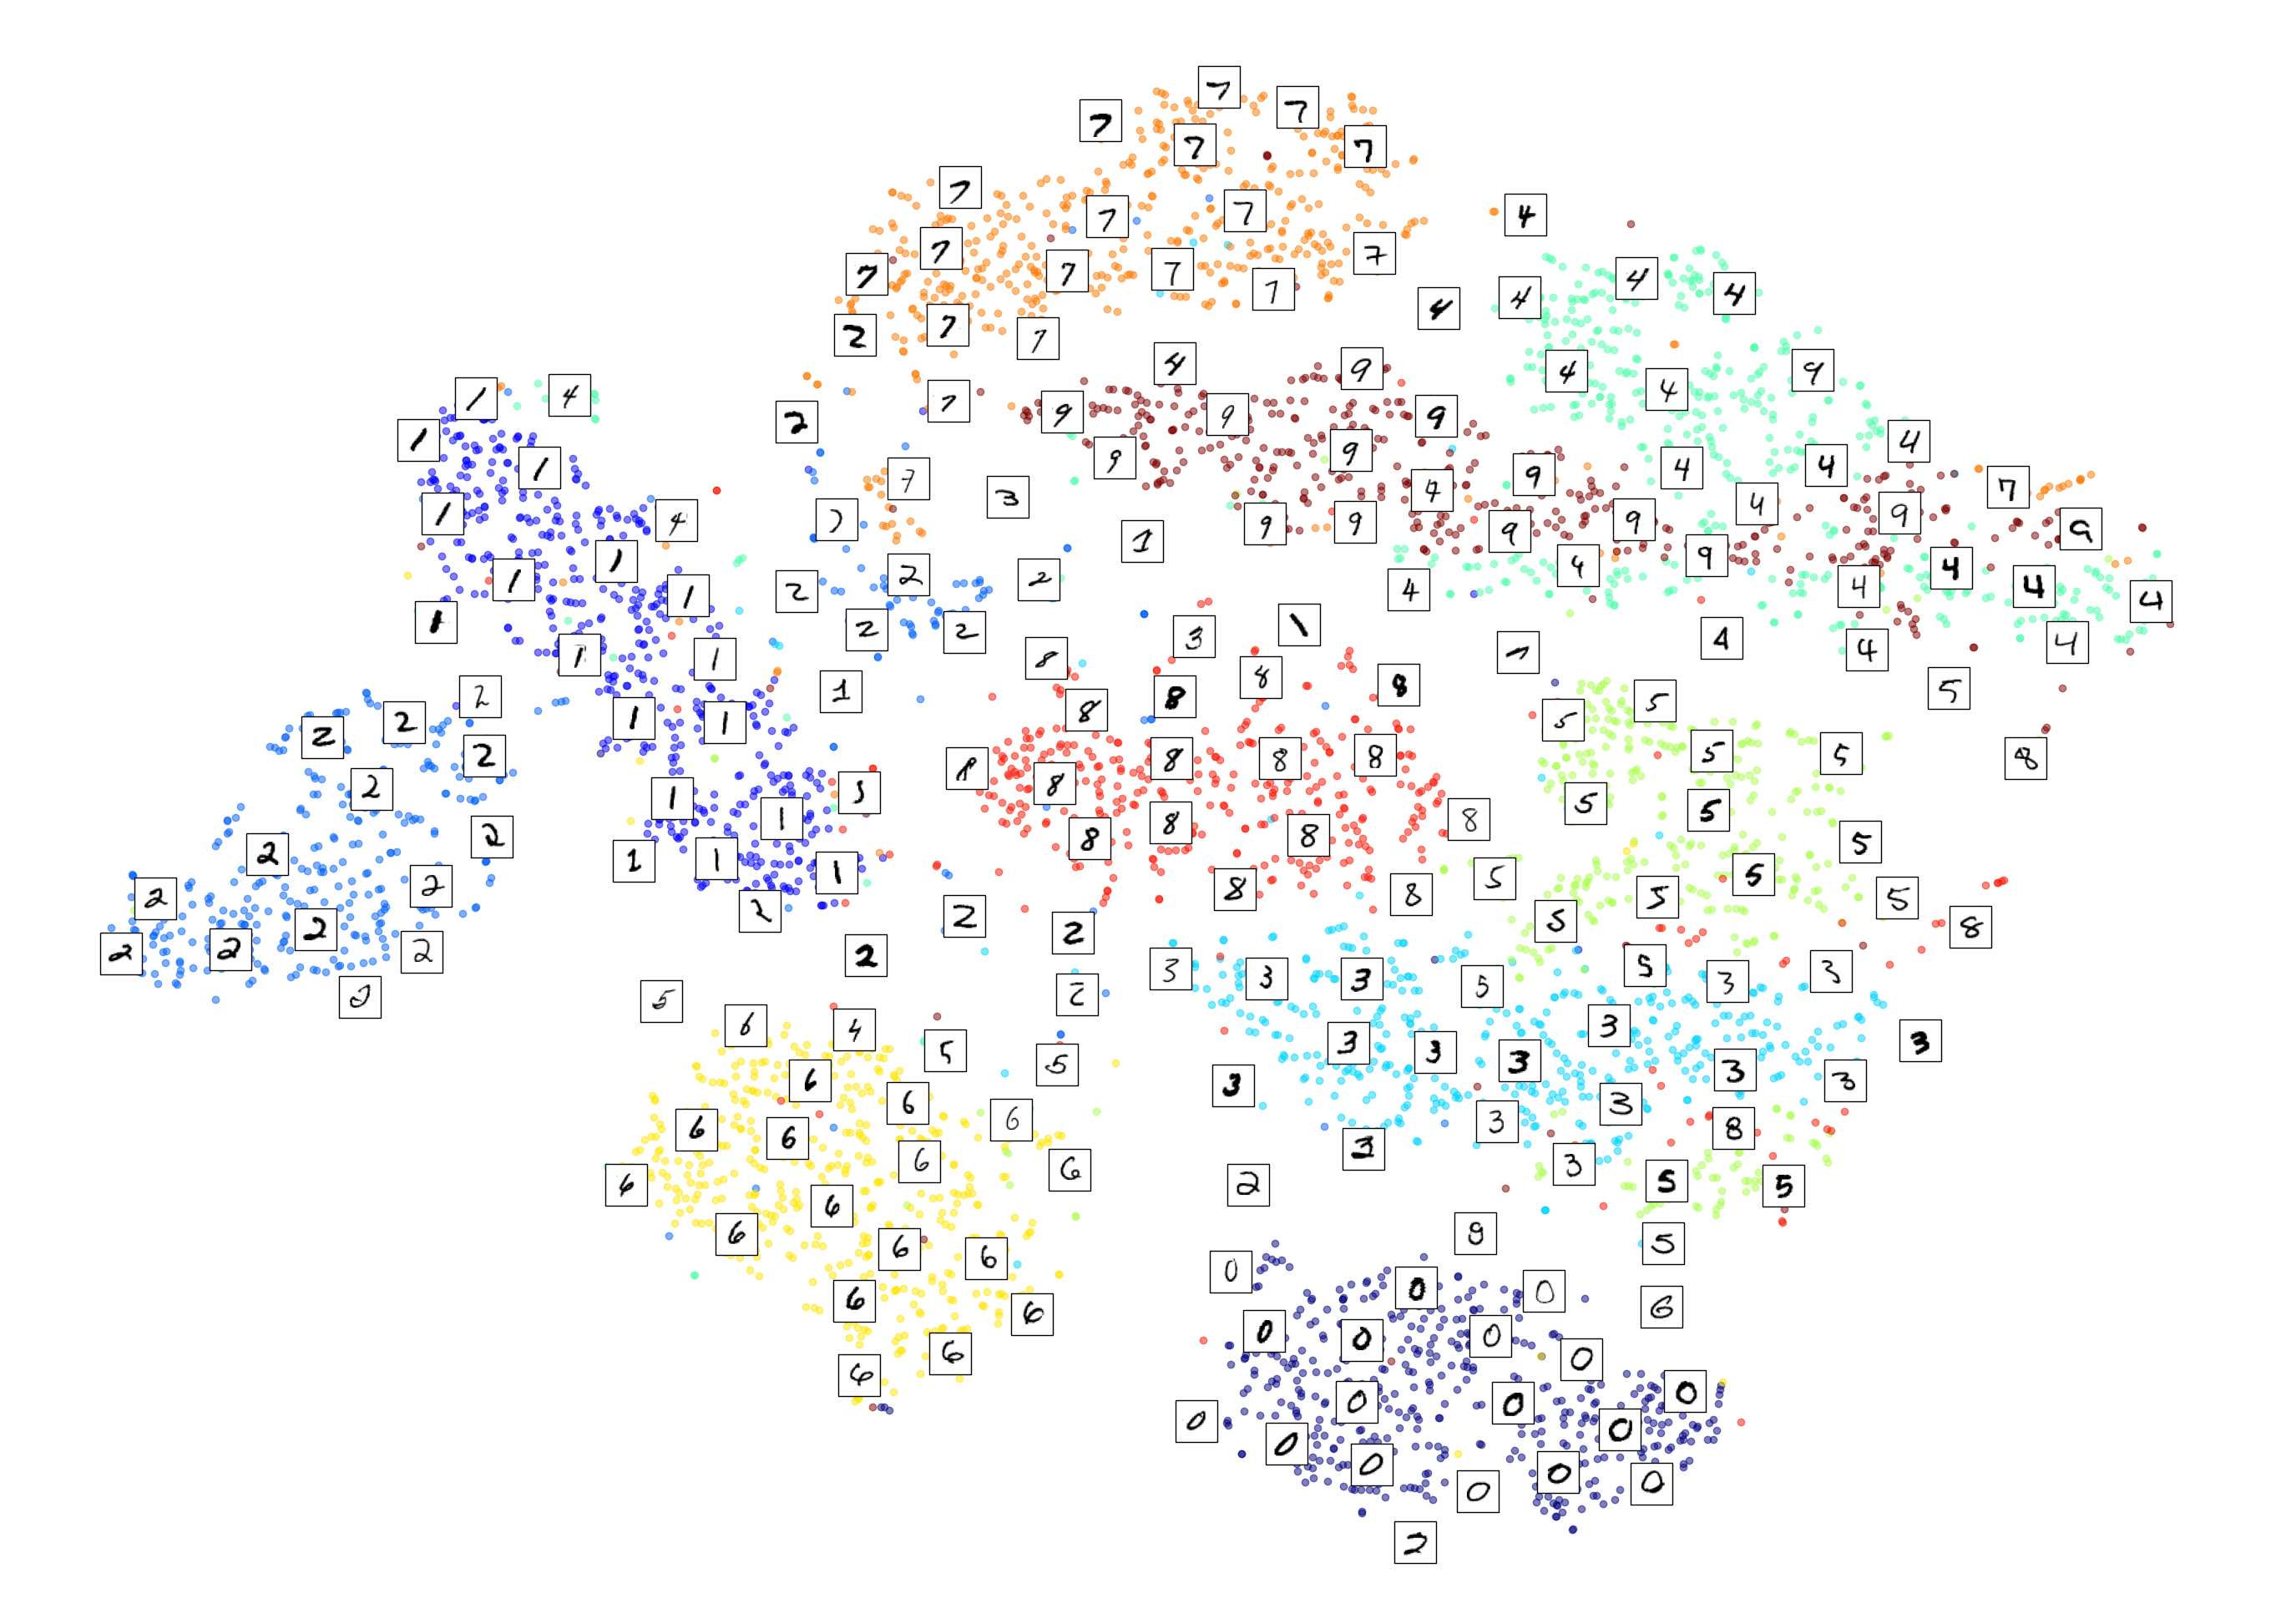

In [70]:
plot_digits(X_reduced, y_sample, images=X_sample, figsize=(35, 25))


**Summarize Key Insights**

**PCA (Principal Component Analysis)**

Characteristics: Linear technique, reduces dimensionality while preserving as much variance as possible.

Strengths: Efficient, interpretable, good for Gaussian-distributed data.

Handling MNIST Data: Effective for initial dimension reduction, but may not capture non-linear relationships.

Suitability: Best for datasets where linear relationships dominate.

**SVD (Singular Value Decomposition)**

Characteristics: Similar to PCA, decomposes data into singular values and vectors.

Strengths: Provides a more nuanced understanding of data variances.

Handling MNIST Data: Like PCA, effective for dimensionality reduction, but limited in capturing non-linearities.

Suitability: Useful for matrix decomposition in text processing and image compression.

**MDS (Multidimensional Scaling)**

Characteristics: Focuses on preserving the pairwise distances between data points.

Strengths: Effective in capturing the true 'distance' between data points.

Handling MNIST Data: Can reveal underlying structures in data, but computationally intensive.

Suitability: Good for visual data exploration, especially where distance metrics are important.

**ISOMap (Isometric Mapping)**

Characteristics: Non-linear method, extends MDS by incorporating geodesic distances.

Strengths: Capable of unfolding curved manifolds.

Handling MNIST Data: Useful for complex datasets, but sensitive to noise.

Suitability: Best for datasets with non-linear manifold structures.

**t-SNE (t-Distributed Stochastic Neighbor Embedding)**

Characteristics: Non-linear, focuses on preserving local structures and relationships.

Strengths: Excellent for visualizing clusters and high-dimensional data.

Handling MNIST Data: Great for separating clusters, but results can vary significantly based on hyperparameters.

Suitability: Ideal for exploratory data analysis and when clusters in high-dimensional data are of interest.

**UMAP (Uniform Manifold Approximation and Projection)**

Characteristics: Balances preservation of local and global data structures.

Strengths: More flexible and faster than t-SNE, preserves more global structure.

Handling MNIST Data: Effective in revealing data patterns and clusters.

Suitability: Versatile for a wide range of datasets, particularly when both local and global structures matter.
Hyperparameter Impact

**t-SNE Hyperparameters (e.g., perplexity, n_iter)**

Impact: Varying perplexity affects the balance between local and global aspects of the data. Too high or too low perplexity can lead to misleading visualizations. The number of iterations influences convergence of the model.

Importance: Critical for achieving meaningful and stable results. Improper settings can lead to incorrect interpretations.

**UMAP Hyperparameters (e.g., n_neighbors, min_dist)**

Impact: n_neighbors controls how UMAP balances local versus global structure, with higher values focusing more on global structure. min_dist affects the tightness of UMAP's embeddings.

Importance: Essential for fine-tuning the balance between detail and broader data trends. Helps in revealing different aspects of the data.

**Recommendations for Usage**

**PCA/SVD:** Use for quick linear dimensionality reduction, especially as a preprocessing step before applying more complex techniques.

**MDS/ISOMap:** Suitable for datasets where maintaining the true distance or manifold structure is critical. Ideal for tasks like creating similarity maps.

**t-SNE:** Best for detailed exploration of clusters in high-dimensional data. Excellent for data with clear groups or subgroups.

**UMAP:** Highly versatile; ideal for datasets where both local relationships and the broader data structure are important. Suitable for a wide range of applications, from genetics to image analysis.

**Limitations and Considerations**

* Computational Efficiency: MDS and ISOMap can be computationally demanding, especially with large datasets. t-SNE is also computationally intensive, though less so than MDS and ISOMap.
* Interpretability: Linear methods like PCA and SVD are more interpretable, while non-linear methods (t-SNE, UMAP) can be harder to interpret and justify.
* Sensitivity to Hyperparameters: t-SNE and UMAP are particularly sensitive to hyperparameter settings, which can lead to different results.
* Data Suitability: Not all techniques are suitable for all data types. Linear methods may not work well with complex, non-linear data, while non-linear methods might overfit on simpler datasets.